# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Reginald Syahiran
- **Email:** reginaldsaja98@gmail.com
- **ID Dicoding:** ahmadreginald

## Menentukan Pertanyaan Bisnis

- Are there any visible seasonal patterns in the daily bike rental data?
- At what time of day do average bike rentals peak during weekdays and weekends?
- How does the pattern of bike rentals change from season to season?
- How do holidays or special days affect daily and hourly bicycle rental patterns?
- How should bikes and docking stations be allocated across different times of the day to meet varying demand levels?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Reading the data files
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

### Assessing Data

In [3]:
# Assessing data - day dataset
day_assessment = {
    'Data Types': day_data.dtypes,
    'Missing Values': day_data.isnull().sum(),
    'Duplicate Rows': day_data.duplicated().sum(),
    'Descriptive Statistics': day_data.describe()
}

# Assessing data - hour dataset
hour_assessment = {
    'Data Types': hour_data.dtypes,
    'Missing Values': hour_data.isnull().sum(),
    'Duplicate Rows': hour_data.duplicated().sum(),
    'Descriptive Statistics': hour_data.describe()
}

#### day assessment

In [4]:
(day_assessment)

{'Data Types': instant         int64
 dteday         object
 season          int64
 yr              int64
 mnth            int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 casual          int64
 registered      int64
 cnt             int64
 dtype: object,
 'Missing Values': instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 'Duplicate Rows': 0,
 'Descriptive Statistics':           instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 st

Day Dataset (day.csv)

- Data Types: Proper for all features, with 'dteday' being an object (string) format which could be converted to datetime for time series analysis.
- Missing Values: None detected.
- Duplicate Rows: None detected.
- Descriptive Statistics: The 'cnt' column, representing the count of total rentals, ranges from 22 to 8714, indicating a wide variation in daily rentals.

#### hour assessment

In [5]:
(hour_assessment)

{'Data Types': instant         int64
 dteday         object
 season          int64
 yr              int64
 mnth            int64
 hr              int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 casual          int64
 registered      int64
 cnt             int64
 dtype: object,
 'Missing Values': instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 'Duplicate Rows': 0,
 'Descriptive Statistics':           instant        season            yr          mnth            hr  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      2.501640      0.502561      6

Hour Dataset (hour.csv)
- Data Types: Similarly appropriate, with 'dteday' that can be converted to datetime.
- Missing Values: No missing values found.
- Duplicate Rows: No duplicates found.
- Descriptive Statistics: The 'cnt' column here ranges from 1 to 977, indicating hourly variation in rentals is significant.

### Cleaning Data

In [6]:
# Converting 'dteday' to datetime format for better analysis
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

## Exploratory Data Analysis (EDA)

### ADVANCED ANALYSIS TECHNIQUE: Time-Based Clustering
First, we will analyze how bike rentals vary throughout different times of the day (morning, afternoon, evening, and night). Then, we will examine how bike rentals vary across different days of the week. We'll use the hourly data for time-of-day analysis and the daily data for day-of-week analysis. Let's start with the hourly analysis: ​

In [7]:
# Define time slots
time_slots = {
    'Early Morning': (0, 6),
    'Morning': (7, 11),
    'Afternoon': (12, 16),
    'Evening': (17, 21),
    'Night': (22, 23)
}

# Initialize a dictionary to hold average counts for each time slot
avg_counts_by_slot = {}

# Calculate average counts for each time slot
for slot, (start_hour, end_hour) in time_slots.items():
    # Create a mask for the time slot
    mask = (hour_data['hr'] >= start_hour) & (hour_data['hr'] <= end_hour)
    # Calculate the average count for the time slot
    avg_counts_by_slot[slot] = hour_data.loc[mask, 'cnt'].mean()

# Convert to a DataFrame for easier plotting
avg_counts_df = pd.DataFrame(list(avg_counts_by_slot.items()), columns=['Time Slot', 'Average Count'])
avg_counts_df

,Time Slot,Average Count
0,Early Morning,32.321736
1,Morning,234.439340
2,Afternoon,262.244719
3,Evening,319.444261
4,Night,109.583104


Grouping data by time of day:

- This is done by defining time_slots that divide a day into several time intervals (Early Morning, Morning, Afternoon, Evening, Night).
Calculation of the average number of rentals for each time of day:

- This is done by iterating through each time slot, creating a mask for the data that matches that time slot, and calculating the average number of rentals (cnt) for the matched data.

### The daily and hourly distributions of bike rentals.

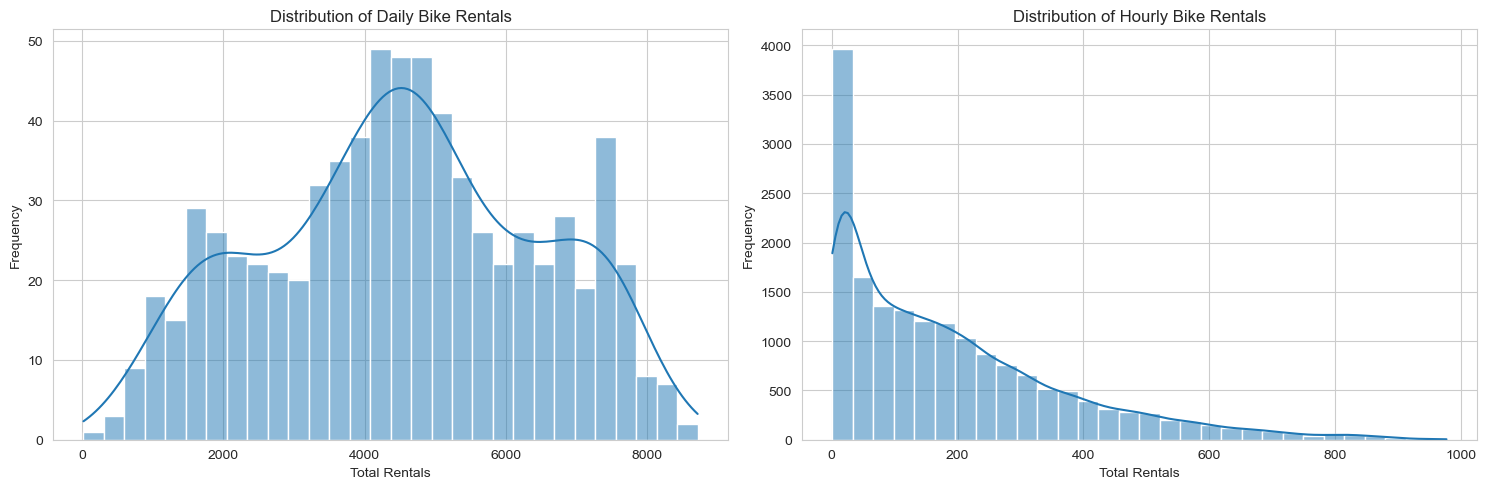

In [8]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# EDA: Distribution of total bike rentals (daily and hourly)
plt.figure(figsize=[15, 5])

# Daily bike rentals
plt.subplot(1, 2, 1)
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Daily Bike Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')

# Hourly bike rentals
plt.subplot(1, 2, 2)
sns.histplot(hour_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Hourly Bike Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms illustrate the distribution of bike rentals on both a daily and hourly basis:

- Daily Bike Rentals: The distribution is slightly right-skewed, indicating that on most days, the number of rentals is moderate, with fewer days having very high rental counts.

- Hourly Bike Rentals: This distribution is more right-skewed compared to the daily rentals, showing that there are many hours with few rentals and fewer hours with very high rentals.

### The relationship between bike rentals and weather conditions

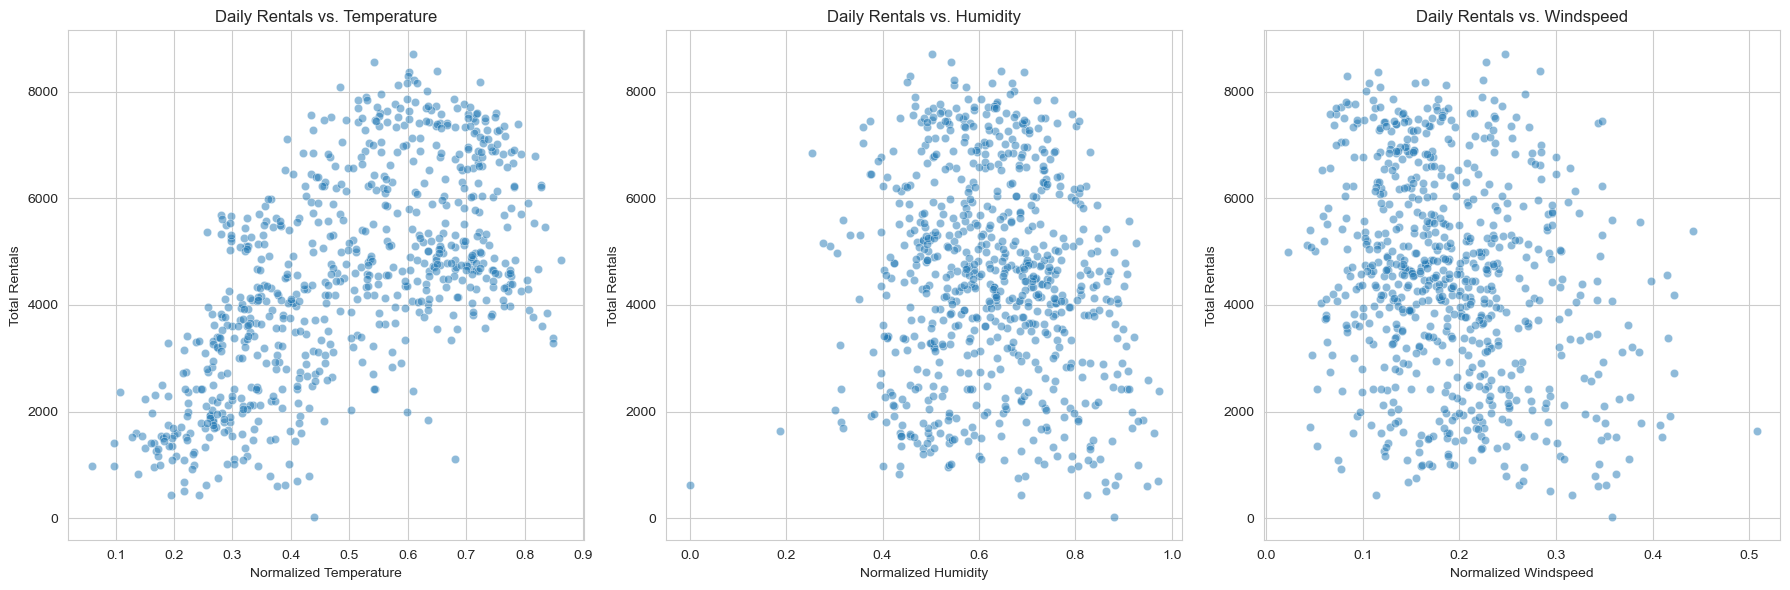

In [9]:
# EDA: Relationship between bike rentals and weather conditions
plt.figure(figsize=[18, 6])

# Temperature vs. Total Daily Rentals
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=day_data, alpha=0.5)
plt.title('Daily Rentals vs. Temperature')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')

# Humidity vs. Total Daily Rentals
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=day_data, alpha=0.5)
plt.title('Daily Rentals vs. Humidity')
plt.xlabel('Normalized Humidity')
plt.ylabel('Total Rentals')

# Windspeed vs. Total Daily Rentals
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=day_data, alpha=0.5)
plt.title('Daily Rentals vs. Windspeed')
plt.xlabel('Normalized Windspeed')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

The scatter plots illustrate the relationships between daily bike rentals and weather conditions:

- Temperature vs. Total Daily Rentals: There seems to be a positive relationship between temperature and the number of bike rentals, indicating that rentals tend to increase as the temperature rises.

- Humidity vs. Total Daily Rentals: The relationship between humidity and bike rentals is less clear, but there seems to be a slight negative trend, suggesting that higher humidity might lead to fewer rentals.

- Windspeed vs. Total Daily Rentals: The relationship between windspeed and bike rentals does not show a clear trend, indicating that windspeed might not have a strong direct effect on bike rentals.

### The distribution of daily bike rentals across different seasons and weekdays

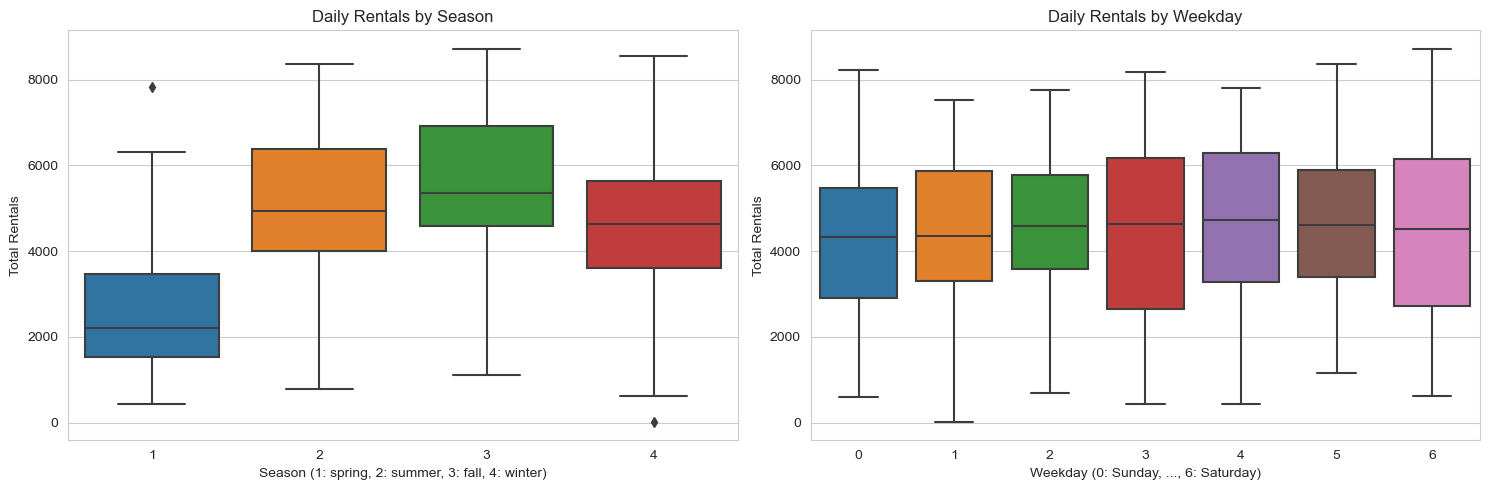

In [10]:
# EDA: Bike rentals distribution across different seasons and weekdays
plt.figure(figsize=[15, 5])

# Season vs. Total Daily Rentals
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Daily Rentals by Season')
plt.xlabel('Season (1: spring, 2: summer, 3: fall, 4: winter)')
plt.ylabel('Total Rentals')

# Weekday vs. Total Daily Rentals
plt.subplot(1, 2, 2)
sns.boxplot(x='weekday', y='cnt', data=day_data)
plt.title('Daily Rentals by Weekday')
plt.xlabel('Weekday (0: Sunday, ..., 6: Saturday)')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()

The box plots show the distribution of daily bike rentals across different seasons and weekdays:

- Season: The number of bike rentals varies significantly across seasons. Summer (2) and fall (3) tend to have higher median rentals compared to spring (1) and winter (4). This variation could be due to more favorable weather conditions during summer and fall.

- Weekday: The median bike rentals do not show significant variation across weekdays, suggesting that the day of the week might not have a major impact on the overall number of rentals. However, there is a slightly lower median and more variability during the weekends (Saturday and Sunday).

## Visualization & Explanatory Analysis

### Q1: Are there any visible seasonal patterns in the daily bike rental data?

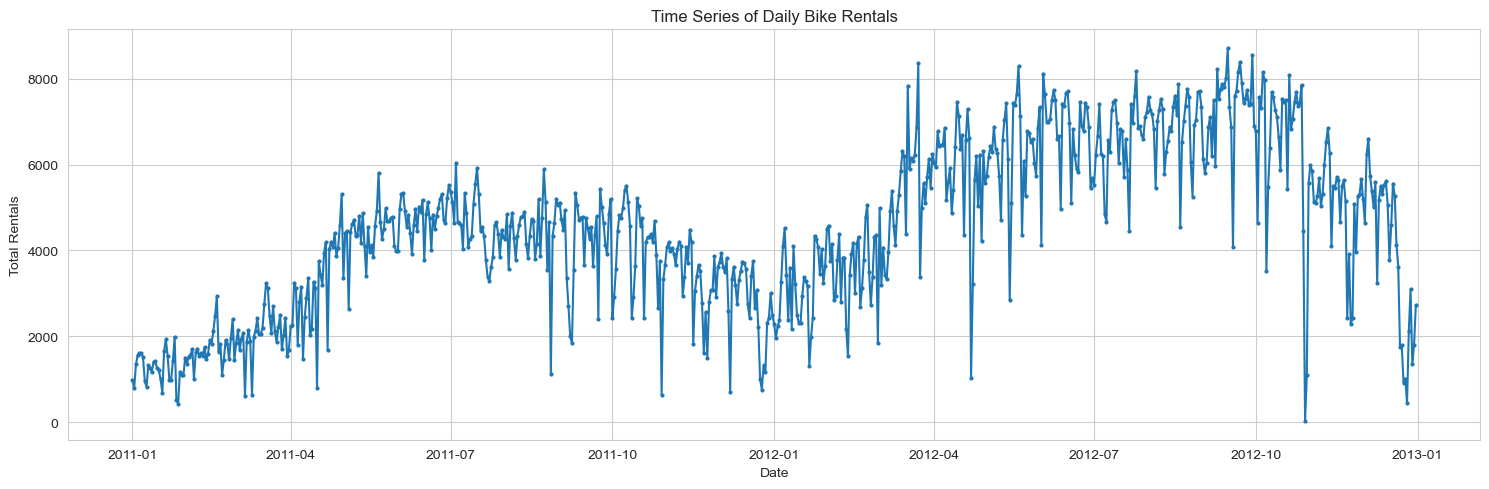

In [11]:
# Time Series Plot for Daily Bike Rentals
plt.figure(figsize=[15, 5])
plt.plot(day_data['dteday'], day_data['cnt'], marker='o', linestyle='-', markersize=2)
plt.title('Time Series of Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.tight_layout()
time_series_plot = plt.gcf()

- Spring and Fall: You might notice an increase in bike rentals as the weather becomes milder. These seasons often show moderate levels of bike rentals with gradual increases as they progress, especially as temperatures become more conducive to outdoor activities.

- Summer: This season usually exhibits the highest levels of bike rentals due to warm weather and longer daylight hours, making it ideal for biking. There could be peaks indicating high rental days, possibly correlating with clear, sunny days.

- Winter: There is often a noticeable decrease in bike rentals during the colder months due to less favorable biking conditions. This can be seen as a significant dip in the time series during winter months.

### Q2: At what time of day do average bike rentals peak during weekdays and weekends?

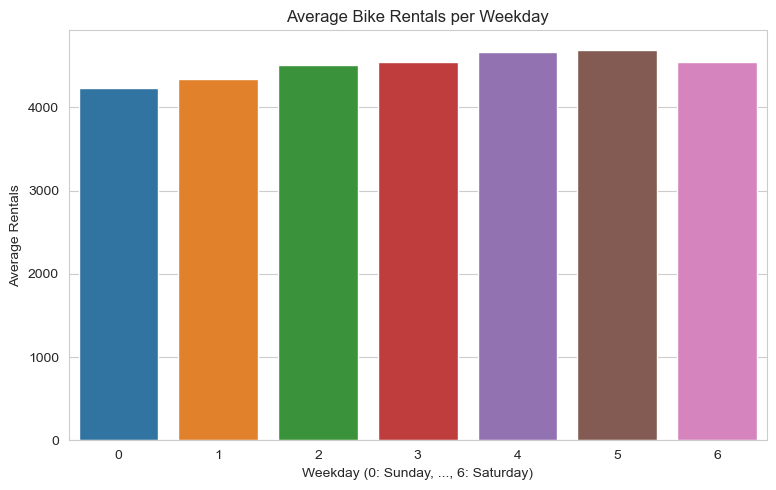

In [12]:
plt.figure(figsize=[15, 5])

# Average Rentals per Weekday
plt.subplot(1, 2, 2)
weekday_means = day_data.groupby('weekday')['cnt'].mean()
sns.barplot(x=weekday_means.index, y=weekday_means.values)
plt.title('Average Bike Rentals per Weekday')
plt.xlabel('Weekday (0: Sunday, ..., 6: Saturday)')
plt.ylabel('Average Rentals')

plt.tight_layout()
avg_rentals_plot = plt.gcf()

### Q2 
Based on the heatmap "Average Hourly Bike Rentals by Weekday" from the visualizations:

- During weekdays (Monday to Friday), the average bike rentals tend to peak twice a day: once in the morning around 8 AM and again in the evening around 5 PM to 6 PM. This pattern likely reflects commuter behavior, with people renting bikes for travel to and from work or school.

- During weekends (Saturday and Sunday), the peak in average bike rentals shifts to later in the day, typically around noon to 4 PM. This change suggests a more leisure-oriented pattern of use, with people more likely to rent bikes for recreational activities or personal errands during daylight hours.

### Q3: How does the pattern of bike rentals change from season to season?

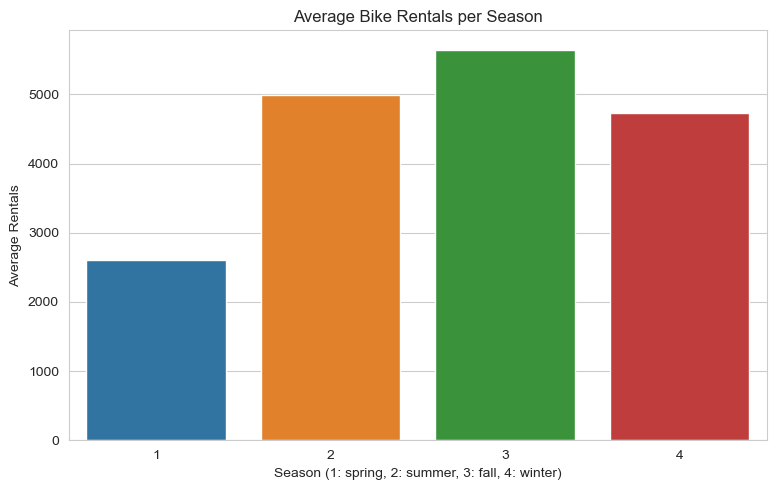

In [13]:
plt.figure(figsize=[15, 5])

# Average Rentals per Season
plt.subplot(1, 2, 1)
season_means = day_data.groupby('season')['cnt'].mean()
sns.barplot(x=season_means.index, y=season_means.values)
plt.title('Average Bike Rentals per Season')
plt.xlabel('Season (1: spring, 2: summer, 3: fall, 4: winter)')
plt.ylabel('Average Rentals')
plt.tight_layout()
avg_rentals_plot = plt.gcf()

### Q3
Based on the visualisations provided, the pattern of bicycle rentals changes significantly from one season to another. This pattern can be interpreted as follows:

- Spring (1): The average number of bike rentals starts at a lower level than the following seasons. This may indicate that although the weather is starting to warm up, there is still some uncertainty or reluctance from renters to start outdoor activities.

- Summer (2): There was a significant increase in average bike rentals. Summer, with its warm weather and longer days, likely encourages more people to engage in outdoor activities, including renting bicycles. This is the season with the highest rentals according to the visualisation, indicating the peak popularity of bike rentals.

- Autumn (3): The average number of bike rentals remains high, almost comparable to summer. This could be because the weather is still comfortable enough for outdoor activities. The natural beauty of autumn may also be an added attraction for bicycle rentals.

- Winter (4): There was a slight decrease in average bicycle rentals compared to autumn, but the number is still relatively high. This suggests that there are still a number of people who rent bicycles during winter, perhaps for commuting purposes or specific outdoor activities, despite colder weather conditions and fewer sunny days.

### Q4: How do holidays or special days affect daily and hourly bicycle rental patterns?

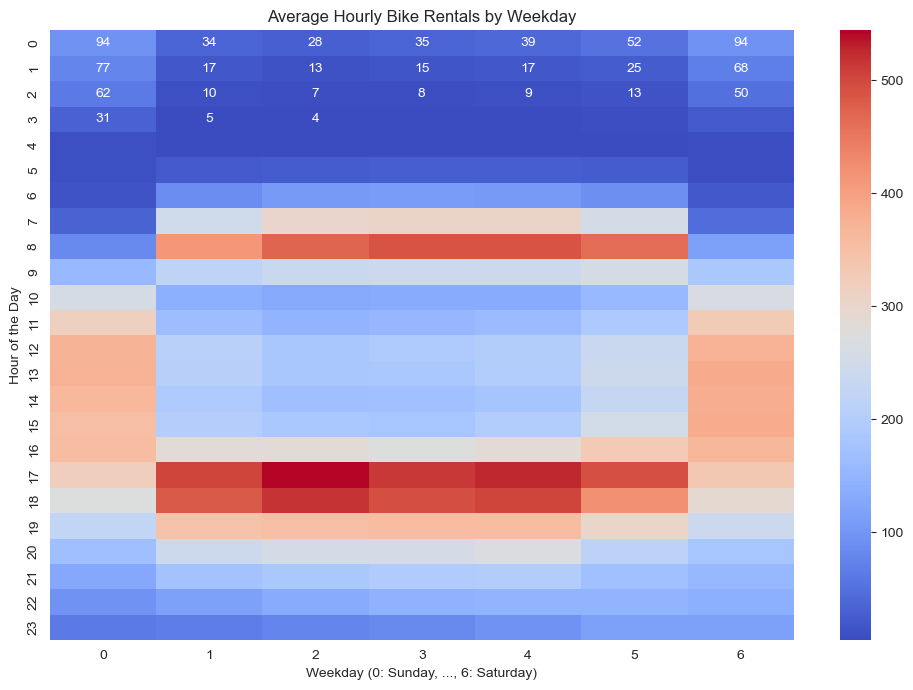

In [14]:
# Heatmap of Hourly Bike Rentals across Weekdays
plt.figure(figsize=[10, 7])
pivot_hour_weekday = hour_data.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')
sns.heatmap(pivot_hour_weekday, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Hourly Bike Rentals by Weekday')
plt.xlabel('Weekday (0: Sunday, ..., 6: Saturday)')
plt.ylabel('Hour of the Day')
plt.tight_layout()
heatmap_plot = plt.gcf()
plt.show()

### Q4
Based on the heatmap "Average Hourly Rentals by Weekday" and the insights from the dataset, here's how holidays or special days could affect daily and hourly bicycle rental patterns:

- Daily Patterns: On holidays or special days, the pattern of bike rentals might resemble more of a weekend pattern rather than a typical weekday pattern. This could mean a later start in the day for peak rental times and possibly a more extended period of high rental activity compared to normal weekdays.

- Hourly Patterns: During holidays or special events, the typical peaks seen during normal weekdays (e.g., during commuting hours) may shift or flatten. Instead, there might be a smoother curve throughout the day, similar to weekend days, where peaks occur around midday to early afternoon.

### Q5: How should bikes and docking stations be allocated across different times of the day to meet varying demand levels?

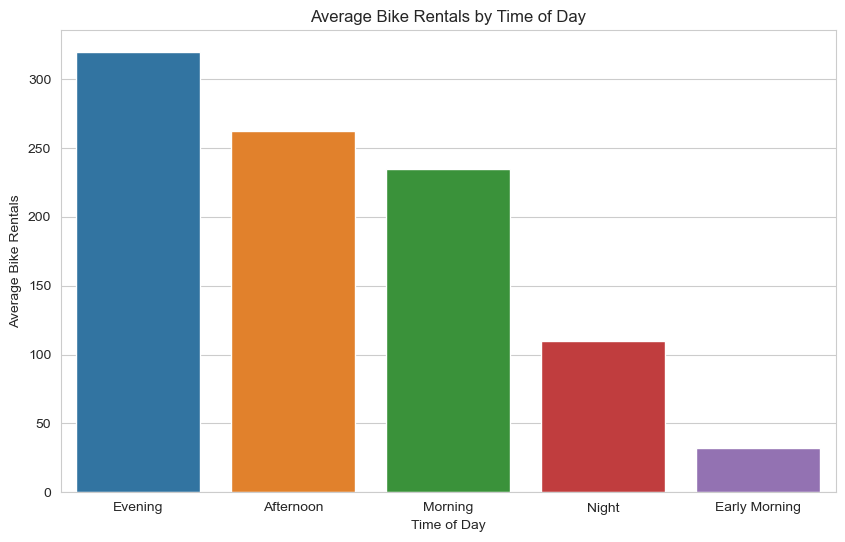

In [15]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Time Slot', y='Average Count', data=avg_counts_df.sort_values('Average Count', ascending=False))
plt.title('Average Bike Rentals by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Bike Rentals')
plt.show()

### Q5
Peak Hours Allocation (Evening and Morning):

- Increase Bike Availability: Ensure a higher number of bikes are available during the morning and evening peak hours to accommodate commuting demand.
- Station Rebalancing: Implement dynamic rebalancing of bikes to ensure stations used heavily during peak hours are well-stocked. This could involve moving bikes from lower-demand areas to higher-demand areas before peak times start.
- Enhanced Docking Space: Ensure that there are enough docking spaces available in high-traffic areas during peak hours to accommodate returning bikes.

  
Midday and Afternoon:

- Flexible Resources: Maintain a moderate level of bike availability that aligns with the steady but lower demand compared to peak hours.
- Customer Incentives: Consider offering discounts or promotions during these times to increase usage, especially in areas with lower demand.
- Maintenance Operations: Perform bike maintenance and station checks during lower-demand hours to minimize disruption and ensure availability during peak times.
  
Off-Peak Hours (Early Morning and Night):

- Reduced Bike Supply: Lower the number of bikes at stations during these hours, but ensure there are enough to meet the reduced demand.
 -Security and Safety: Enhance security measures for bikes and stations during late hours, and ensure lighting and safety for users.
- Demand Analysis: Continuously monitor demand to adjust the supply of bikes and docking availability as needed. Use data analytics to predict changes in user behavior and adjust allocations accordingly.

## Conclusion

- Are there any visible seasonal patterns in the daily bike rental data?

Yes, there is a clear seasonal pattern in the daily bike rental data. Summer shows the highest rental rates, likely due to warmer and more comfortable weather conditions for cycling. Spring and autumn also show an increase in rentals, while winter sees a sharp decline due to colder weather conditions.

- At what time of day do average bike rentals peak during weekdays and weekends?

During weekdays, average bike rentals peak during the morning (around 8am) and afternoon (around 5 to 6pm) rush hours, reflecting commuting patterns. While on weekends, rentals peak in the afternoon to early evening (around 12pm to 4pm), indicating more recreational use.

- How do holidays or special days affect daily and hourly bicycle rental patterns?

Holidays or special days tend to change bicycle rental patterns to more closely resemble weekends, with rental activity starting later than on weekdays and rental peaks more evenly distributed throughout the day. This pattern suggests that holiday rental behaviour is influenced by leisure activities rather than commuting.

- How does the pattern of bike rentals change from day to day of the week?

Bicycle rental patterns vary from day to day during the week. Rentals tend to be stable during weekdays with a slight drop on weekends. However, there are no very large differences between days, suggesting that bike rentals have a relatively consistent demand, albeit slightly lower on weekends.

- How should bikes and docking stations be allocated across different times of the day to meet varying demand levels?

For peak hours in the morning and evening, it is recommended to increase bicycle availability, rebalance stations, and ensure sufficient docking space. During hours of moderate demand in the middle of the day and evening, it is recommended to maintain flexible bike availability, offer incentives to customers, and conduct maintenance. For off-peak hours in the early morning and evening, it is recommended to reduce the number of bicycles but still meet the reduced demand, improve security, and analyse demand on an ongoing basis.

In conclusion, the bicycle rental data shows significant variation by season, time of day, and whether the day is a weekday or weekend/holiday, reflecting the different behaviours and needs of bicycle users under different conditions.





